In [1]:
# Loading libraries
%matplotlib inline
import os
import os.path
from netCDF4 import Dataset
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
import fnmatch
from cycler import cycler
import pandas as pd
from pandas import read_csv, to_datetime, DataFrame
import datetime
import time
import matplotlib.dates as mdates

from matplotlib.path import Path
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap # Basemap pour les cartes

In [2]:
# LOADING GRID FILE AND VARIABLES
!pwd
grid_file = '../DATA/grille.nc' 
print 'file exist:', os.path.isfile(grid_file)

f = Dataset(grid_file) # open netcdf
# extracting variables
lon_t = f.variables['longitude_t'][:] # extracting lon data
lat_t = f.variables['latitude_t'][:] # extracting lat data
depth_t = f.variables['depth_t'][:]
dxdy = f.variables['dxdy_t'][:]
dz = f.variables['dz_t'][:]
mask = f.variables['mask_t'][:]
bathy = f.variables['h_w'][:]
print 'Bathy :', np.shape(bathy), 'max :', np.max(bathy), 'min :', np.min(bathy)

f.close()

new_bath = np.ma.masked_where(bathy<200, bathy)
new_bath2 = np.ma.masked_where(lon_t<-5.5, new_bath)
#region_list = ['NWE', 'SWE', 'ION', 'LEV'] #

/home/dosa/MON_ENV_PYTHON/ARTICLE_IAV
file exist: True
Bathy : (160, 394) max : 5054.49 min : 20.5226


In [3]:
# test #
test = bathy
test[test<=200] = 0
test[test>200] = np.nan
test[lon_t<-5.5] = np.nan
test[(lat_t>40) & (lon_t>26.9)] = np.nan

In [4]:
#var_bio = ['ppb','netppb','ncp','resp','export_poc200','export_doc200','export_nit_sw','export_nit_iw','chlsurf'] # new vers
#var_phy = ['eke', 'mld', 'ssr', 'sss', 'sst', 'si', 'rain', 'xwind', 'ywind', 'zwind']
#var_phy = ['sst', 'sss', 'mld', 'si', 'eke', 'rain', 'ssr', 'xwind', 'ywind', 'zwind']
#var_phy = ['export_poc200', 'export_doc200']
#var_phy = ['exp_poc200', 'exp_doc200']
#var_phy = ['nit_sw']
var_phy = ['mld', 'si', 'eke', 'nit_sw']
#var_phy = ['sst', 'sss', 'rain', 'ssr', 'xwind', 'ywind', 'zwind']

correl_1 = './LAST_OUTPUT_APR2019/IAV_2011.nc'
print 'file exist:', os.path.isfile(correl_1)

f = Dataset(correl_1) # open netcdf
for phyvar in var_phy:
    vars()['std_'+phyvar] = f.variables['std_'+phyvar][0,:,:] # extracting data
    vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:]# extracting data
f.close()

#np.shape(stand_IAV_zwind) # (160, 394) seems ok!
        
print 'END of CELL'

file exist: True
END of CELL


In [5]:
var_phy = ['exp_poc200', 'exp_doc200']

correl_1 = './LAST_OUTPUT_APR2019/IAV_2011.nc'
print 'file exist:', os.path.isfile(correl_1)

f = Dataset(correl_1) # open netcdf
for phyvar in var_phy:
    #vars()['std_'+phyvar] = f.variables['std_'+phyvar][0,:,:] # extracting data
    vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:]# extracting data
f.close()

var_phy = ['export_poc200', 'export_doc200']
f = Dataset(correl_1) # open netcdf
for phyvar in var_phy:
    vars()['std_'+phyvar] = f.variables['std_'+phyvar][0,:,:] # extracting data
    #vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:]# extracting data
f.close()
        
print 'END of CELL'

file exist: True
END of CELL


In [6]:
# Nuts
var_nut = ['nit_int150', 'UptNitsurf', 'UptNitint', 'nit_sw', 'nit_iw', 'UptAmmoSur', 'UptAmmoint',
          'pho_int150', 'UptPsurf'] # 'nit_int200', 'pho_int200',

correl_1 = './LAST_OUTPUT_APR2019/IAV_2011.nc'
print 'file exist:', os.path.isfile(correl_1)

f = Dataset(correl_1) # open netcdf
for phyvar in var_nut:
    vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:]# extracting data
    if phyvar == 'UptAmmoSur':
        vars()['std_'+phyvar] = f.variables['std_'+phyvar+'f'][0,:,:] # extracting data
    else:
        vars()['std_'+phyvar] = f.variables['std_'+phyvar][0,:,:]# extracting data
f.close()
        
print 'END of CELL'

file exist: True
END of CELL


In [7]:
# Bio
var_bio = ['chl_tot', 'chl_int150', 'chlsurf', 'phyto', 'ppb', 'netppb', 'bactc', 'zoo', 'ncp', 'resp']

correl_1 = './LAST_OUTPUT_APR2019/IAV_2011.nc'
print 'file exist:', os.path.isfile(correl_1)

f = Dataset(correl_1) # open netcdf
for phyvar in var_bio:
    if phyvar == 'ncp':
        vars()['std_'+phyvar] = f.variables['std_ppb_'+phyvar][0,:,:] # extracting data
        vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:] # extracting data
        
    elif phyvar == 'phyto':
        vars()['std_'+phyvar] = f.variables['std_stock_'+phyvar][0,:,:] # extracting data
        vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:] # extracting data
    elif phyvar == 'zoo':
        vars()['std_'+phyvar] = f.variables['std_stock_'+phyvar][0,:,:] # extracting data
        vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:] # extracting data
    elif phyvar == 'chl_tot':
        vars()['std_'+phyvar] = f.variables['std_stock_'+phyvar][0,:,:] # extracting data
        vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:] # extracting data
    elif phyvar == 'bactc':
        vars()['std_'+phyvar] = f.variables['std_stock_'+phyvar][0,:,:] # extracting data
        vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:] # extracting data
        
    else:
        vars()['std_'+phyvar] = f.variables['std_'+phyvar][0,:,:] # extracting data
        vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:] # extracting data
        
f.close()

# Bio
var_bio = ['graz', 'grazh', 'grazp']

f = Dataset(correl_1) # open netcdf
for phyvar in var_bio:
    vars()['std_'+phyvar] = f.variables['std_'+phyvar][0,:,:] # extracting data
    vars()['stand_IAV_'+phyvar] = f.variables['stand_IAV_'+phyvar][0,:,:] # extracting data

f.close()
        
print 'END of CELL'

file exist: True
END of CELL


In [8]:
# 18/03 TEST BIO live
## Création des arrays en lisant moyenne annuelles
file_path = "./LAST_OUTPUT_APR2019/"

var_list = ['chl_tot', 'diac', 'nanoc', 'synec', 'bactc', 'zoomesoc', 'zoomicroc', 'zoonanoc']

year_list = np.arange(1970,2012)
c = 0

for var in var_list:
    vars()['stock_'+var] = np.zeros([len(year_list), 160, 394])
    vars()['stock_'+var][:] = np.nan

for year in year_list:
    print year
    f = Dataset(file_path+str(year)+'.nc')
    
    for var in var_list:
        temp_arr = f.variables[var][0,:,:,:] # extracting data
        #print 'np.shape(temp_arr):', np.shape(temp_arr)
        stock_arr = np.zeros([160, 394])
        stock_arr[:] = np.nan
        
        for i in np.arange(0,160):
            for j in np.arange(0,394):
                if np.ma.is_masked(new_bath2[i,j])==False: # pour éviter calculs inutiles
                    for k in np.arange(0,43):
                        #if np.ma.is_masked(dz_t[k,i,j])==False:
                        temp_prod = np.nanprod([temp_arr[k,i,j],dz[k,i,j]])
                        #stock_arr[i,j] = np.nansum(stock_arr[i,j],np.nanprod([temp_arr[k,i,j],dz_t[k,i,j]]))
                        stock_arr[i,j] = np.nansum([stock_arr[i,j],temp_prod])
        
        vars()['stock_'+var][c,:,:] = stock_arr         
        temp_arr = []
        
    f.close()
                
    c += 1

print 'END Stock COMPUTING'

1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
END Stock COMPUTING


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [9]:
# TEST to create a shifted diverging colormap
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = mpl.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

test_cm2 = shiftedColorMap(plt.cm.RdBu_r,midpoint=0.16667)

In [358]:
# SUM - PHYS

#plt.figure(figsize=(25,9));
c = 1
data_to_plot = np.zeros([160,394])
#data_to_plot[:] = np.nan

var_phy = ['nit_sw', 'nit_int150', 
           'phyto', 'netppb', 'UptNitsurf', 'UptAmmoSur','bactc', 
           'zoo', 'graz', 'exp_poc200', 'exp_doc200', 'resp']

#var_phy = ['nit_sw', 'nit_int150',  'netppb', 'UptNitsurf', 'UptAmmoSur','bactc', 'zoo', 'graz', 'exp_poc200', 'exp_doc200']
# change pas grand chose

for phyvar in var_phy:
    
        # Creating corresponding variable names
    temp = vars()['stand_IAV_'+phyvar]
    temp = np.ma.masked_where(bathy<200,temp)
    temp = np.ma.masked_where(lon_t<-5.5,temp)
    
    data_to_plot = data_to_plot+temp

#plt.savefig('/home/dosa/THESE/CR_reunions/MAR2019_FIGS/STD_VAR_STAND_IAV/REGION/DISPO/TEST_FULLMED_DISPO4.png',bbox_inches='tight',format='png')
print "END of script"

END of script


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in less


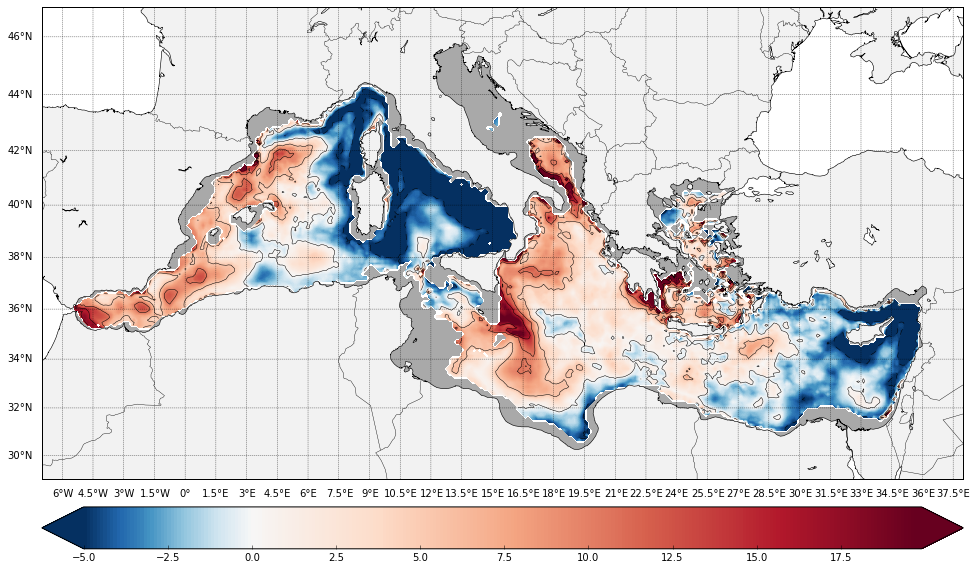

In [10]:
# SUM - PHYS
# 16.04 Deleting nit_sw (explaining process)

#plt.figure(figsize=(25,9));
c = 1
data_to_plot = np.zeros([160,394])
#data_to_plot[:] = np.nan

var_phy = ['nit_int150', 
           'phyto', 'netppb', 'UptNitsurf', 'UptAmmoSur','bactc', 
           'zoo', 'graz', 'exp_poc200', 'exp_doc200', 'resp']

#var_phy = ['nit_sw', 'nit_int150',  'netppb', 'UptNitsurf', 'UptAmmoSur','bactc', 'zoo', 'graz', 'exp_poc200', 'exp_doc200']
# change pas grand chose

for phyvar in var_phy:
    
        # Creating corresponding variable names
    temp = vars()['stand_IAV_'+phyvar]
    temp = np.ma.masked_where(bathy<200,temp)
    temp = np.ma.masked_where(lon_t<-5.5,temp)
    
    data_to_plot = data_to_plot+temp

test_cm4 = shiftedColorMap(plt.cm.RdBu_r,midpoint=0.2)

fig = plt.figure(figsize=(16,16));
x1,x2,y1,y2 = -7, 38, 29, 47;
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
ax = fig.add_axes([0.1,0.1,0.8,0.8]);
m.drawcountries(linewidth=0.4);
m.drawcoastlines(linewidth=0.6);
m.fillcontinents(color='0.95',lake_color='white');
parallels = np.arange(0.,81,2);
m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
meridians = np.arange(-6.,351.,1.5);
m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

# doing a map # Données
xd,yd = m(lon_t,lat_t);
levels = np.arange(-5,20,0.1);
levels2 = np.arange(-5,20,5);
levels_bathy = [200] ;
m.contourf(xd,yd,test,cmap=plt.cm.Greys);
CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='grey');
cs = m.contourf(xd,yd,data_to_plot,cmap=test_cm4,levels=levels,extend ='both');# binary / jet ,levels=levels
cs_c = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.5,colors='k');
plt.colorbar(cs, orientation='horizontal', pad = 0.03)

#plt.savefig('/home/dosa/THESE/CR_reunions/APR2019_FIGS/STD_VAR_STAND_IAV/SUM_MINUS_PHYS_NITSW.png',bbox_inches='tight',format='png')

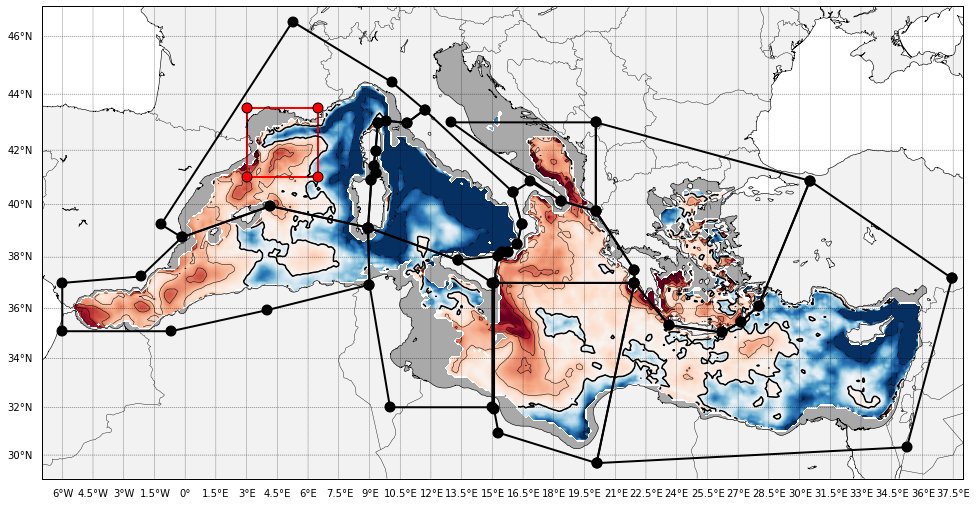

In [13]:
# 24/05 SUM-PHYS-nit_sw

fig = plt.figure(figsize=(16,16));
x1,x2,y1,y2 = -7, 38, 29, 47;
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
ax = fig.add_axes([0.1,0.1,0.8,0.8]);
m.drawcountries(linewidth=0.4);
m.drawcoastlines(linewidth=0.6);
m.fillcontinents(color='0.95',lake_color='white');
parallels = np.arange(0.,81,2);
m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
meridians = np.arange(-6.,351.,1.5);
m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

# doing a map # Données
xd,yd = m(lon_t,lat_t);
levels = np.arange(-5,20,0.1);
levels2 = np.arange(-5,20,5);
levels_bathy = [200] ;
m.contourf(xd,yd,test,cmap=plt.cm.Greys);
CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='grey');
cs = m.contourf(xd,yd,data_to_plot,cmap=test_cm4,levels=levels,extend ='both');# binary / jet ,levels=levels
cs_c = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.5,colors='k');
levels_0 = [0] ;
cs_zero = m.contour(xd,yd,data_to_plot,levels=levels_0,linewidths=1.5,colors='k');

region_list = ['ALB_ALG', 'ADR', 'N_ION', 'NWMED', 'EMED', 'S_ION', 'TYR', 'CMED', 'AEG', 'GOL']

curr_col = 'black'

for region in region_list:
    # Defining the coordinates
    if region == 'NWMED':
        y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                39.247095, 46.4938123, 44.4124705]
        x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                -1.17747, 5.2446879, 10.1001797]
    elif region == 'ALB_ALG':
        y = [35.093681, 35.093681, 37, 37.252960, 38.756497, 39.938244, 39.1284526, 36.93272338, 35.930524]
        x = [-0.690137, -6, -6, -2.159892, -0.162487, 4.159323, 8.92564455, 9, 3.994854] # 9.90934876
    elif region == 'TYR':
        y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
        x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
    elif region == 'CMED':
        y = [39.1284526, 36.93272338, 32, 32, 37, 37.88508389278273]
        x = [8.92564455, 9, 10, 15, 15, 13.3111744311976] # 9.90934876
    elif region == 'ADR':
        y = [40.138887,39.746050,43,43]
        x = [18.343058,20.052826,20.052826,13]
    elif region == 'N_ION':
        y = [37.001816,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,39.25645461354518,
                40.44930918149475,40.857014,40.138887,39.746050,37.503355,37]
        x = [15.084801,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,16.43223864162354,
                16.01437911440215,16.854632,18.343058,20.052826,21.936077,21.936077]
    elif region == 'S_ION':
        y = [37,29.658354,30.941890,31.924008, #37.503355
                37.001816]
        x = [21.936077,20.090485,15.297679,15.081913,15.084801]
    elif region == 'EMED':
        y = [37,35.335479,35.045582,35.478996,36.113327,40.879240,37.180585, 37.180585,30.329515,29.658354]
        x = [21.936077,23.620988,26.217209,27.159167,28.006273,30.504893,37.441401, 37.441401,35.238352,20.090485]   
    elif region == 'AEG':
        y = [43,39.746050,37.503355,37,35.335479,35.045582,35.478996,36.113327,40.879240]
        x = [20.052826,20.052826,21.936077,21.936077,23.620988,26.217209,27.159167,28.006273,30.504893]
    elif region == 'GOL':
        y = [43.5,43.5,41,41]
        x = [3,6.5,6.5,3]
        curr_col = 'red'
    else:
        print 'Les coordonnées pour le nom de région : ', region, ' ne sont pas définies ici'

    # Polygone
    xx,yy = m(x,y); # conversion coordonnées
    vertices = np.array([np.hstack((xx, 0)),np.hstack((yy, 0))],float).transpose();
    path = Path(vertices, codes=None, closed=True);
    pathpatch = PathPatch(path, facecolor='None', edgecolor=curr_col,linewidth=2.); # edgecolor='k',
    ax.add_patch(pathpatch); # affichage du polygone
    ax.scatter(xx,yy, s=100, c=curr_col, marker='o',zorder=6); # ajoute les points c='k',
    
plt.savefig('/home/dosa/THESE/CR_reunions/MAY2019_FIGS/NEWMAP_NEWREGIONS.png',bbox_inches='tight',format='png')

In [31]:
# 14.04

sum_corr = data_to_plot

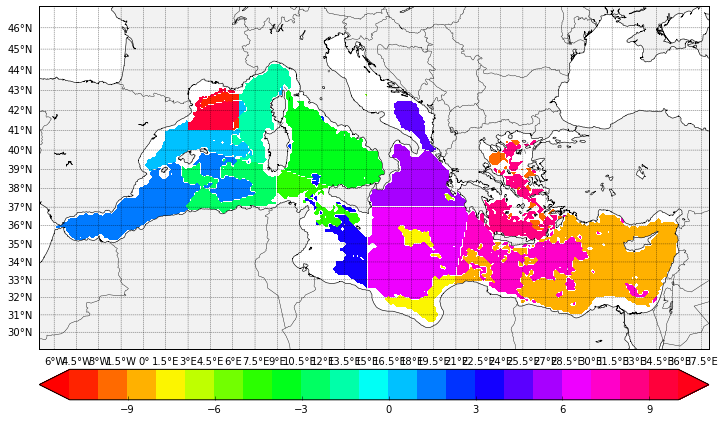

In [14]:
# 16/05 Creating the mask
### Creating a mask to compute MLD in Fortran
region_list = ['ALB_ALG', 'ADR', 'N_ION', 'NWMED', 'EMED', 'S_ION', 'TYR', 'CMED', 'AEG', 'GOL']
x1,x2,y1,y2 = -7, 38, 29, 47;

# doing a map
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
# figure
plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1,0.1,0.8,0.8]);
m.drawcountries(linewidth=0.4);
m.drawcoastlines(linewidth=0.6);
m.fillcontinents(color='0.95',lake_color='white');
parallels = np.arange(0.,81,1);
m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
meridians = np.arange(-6.,351.,1.5);
m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

for region in region_list:
    # Defining the coordinates
    if region == 'NWMED':
        y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                39.247095, 46.4938123, 44.4124705]
        x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                -1.17747, 5.2446879, 10.1001797]
        mask_value = 1
    elif region == 'ALB_ALG':
        y = [35.093681, 35.093681, 37, 37.252960, 38.756497, 39.938244, 39.1284526, 36.93272338, 35.930524]
        x = [-0.690137, -6, -6, -2.159892, -0.162487, 4.159323, 8.92564455, 9, 3.994854] # 9.90934876
        mask_value = 2
    elif region == 'TYR':
        y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
        x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
        mask_value = 3
    elif region == 'CMED':
        y = [39.1284526, 36.93272338, 32, 32, 37, 37.88508389278273]
        x = [8.92564455, 9, 10, 15, 15, 13.3111744311976] # 9.90934876
        mask_value = 4
    elif region == 'ADR':
        y = [40.138887,39.746050,43,43]
        x = [18.343058,20.052826,20.052826,13]
        mask_value = 5
    elif region == 'N_ION':
        y = [37.001816,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,39.25645461354518,
                40.44930918149475,40.857014,40.138887,39.746050,37.503355,37]
        x = [15.084801,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,16.43223864162354,
                16.01437911440215,16.854632,18.343058,20.052826,21.936077,21.936077]
        mask_value = 6
    elif region == 'S_ION':
        y = [37,29.658354,30.941890,31.924008, #37.503355
                37.001816]
        x = [21.936077,20.090485,15.297679,15.081913,15.084801]
        mask_value = 7
    elif region == 'EMED':
        y = [37,35.335479,35.045582,35.478996,36.113327,40.879240,37.180585, 37.180585,30.329515,29.658354]
        x = [21.936077,23.620988,26.217209,27.159167,28.006273,30.504893,37.441401, 37.441401,35.238352,20.090485]
        mask_value = 8
    elif region == 'AEG':
        y = [43,39.746050,37.503355,37,35.335479,35.045582,35.478996,36.113327,40.879240]
        x = [20.052826,20.052826,21.936077,21.936077,23.620988,26.217209,27.159167,28.006273,30.504893]
        mask_value = 9
    elif region == 'GOL':
        y = [43.5,43.5,41,41]
        x = [3,6.5,6.5,3]
        mask_value = 10
    else:
        print 'Les coordonnées pour le nom de région : ', region, ' ne sont pas définies ici'
                
    # Selecting the data
    vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
    path = Path(vertices, codes=None, closed=True);
    indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                    transform=None, radius=0.0)
    indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone
    
    # Creating corresponding variable names
    #vars()['mask_'+region] = np.zeros([160,394])
    #vars()['mask_'+region][:] = mask_value
    #vars()['mask_'+region] = np.ma.masked_array(vars()['mask_'+region],indices_re==False)
    #vars()['mask_'+region] = np.ma.masked_array(vars()['mask_'+region], new_bath<200)

    #vars()['mask_'+region] = np.ma.masked_where(np.isnan(vars()['sumiav_'+region]), vars()['mask_'+region])
    vars()['mask_pos_'+region] = np.zeros([160,394])
    vars()['mask_pos_'+region][:] = mask_value
    vars()['mask_pos_'+region] = np.ma.masked_array(vars()['mask_pos_'+region], vars()['sumiav_'+region] < 0)
    vars()['mask_pos_'+region] = np.ma.masked_array(vars()['mask_pos_'+region],indices_re==False)
    vars()['mask_pos_'+region] = np.ma.masked_array(vars()['mask_pos_'+region], new_bath<200)
    
    vars()['mask_neg_'+region] = np.zeros([160,394])
    vars()['mask_neg_'+region][:] = -mask_value
    vars()['mask_neg_'+region] = np.ma.masked_array(vars()['mask_neg_'+region], vars()['sumiav_'+region] >= 0)
    vars()['mask_neg_'+region] = np.ma.masked_array(vars()['mask_neg_'+region],indices_re==False)
    vars()['mask_neg_'+region] = np.ma.masked_array(vars()['mask_neg_'+region], new_bath<200)
            
    data_to_plot_pos = vars()['mask_pos_'+region]
    data_to_plot_neg = vars()['mask_neg_'+region]
    # Données
    xd,yd = m(lon_t,lat_t);
    levels = np.arange(-11,11,1);
    cs = m.contourf(xd,yd,data_to_plot_pos,levels=levels,cmap=plt.cm.hsv,extend='both');# binary / jet
    m.contourf(xd,yd,data_to_plot_neg,levels=levels,cmap=plt.cm.hsv,extend='both');# binary / jet

plt.colorbar(cs, orientation='horizontal', pad = 0.03)
#eval('plt.title(\''+region+'\')')

In [15]:
test_mask = np.ma.vstack(mask_pos_ALB_ALG, mask_neg_ALB_ALG, mask_pos_NWMED, mask_neg_NWMED, mask_pos_GOL, mask_neg_GOL,
                        mask_pos_TYR, mask_neg_TYR, mask_pos_CMED, mask_neg_CMED, mask_pos_ADR, mask_pos_N_ION, 
                         mask_pos_S_ION, mask_neg_S_ION, mask_pos_EMED, mask_neg_EMED, mask_pos_AEG, mask_neg_AEG)
np.shape(test_mask) #(4, 160, 394)

(18, 160, 394)

In [16]:
mask_sum = np.ma.sum(test_mask,axis=0)
np.shape(mask_sum)

(160, 394)

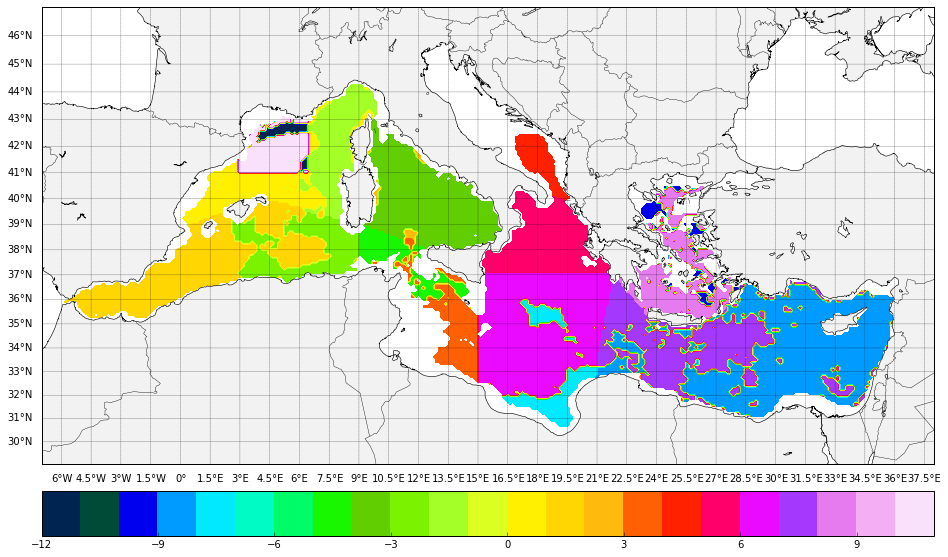

In [55]:
# doing a map
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
plt.figure(figsize=(16,16))
ax = fig.add_axes([0.1,0.1,0.8,0.8]);
m.drawcountries(linewidth=0.4);
m.drawcoastlines(linewidth=0.6);
m.fillcontinents(color='0.95',lake_color='white');
parallels = np.arange(0.,81,1);
m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
meridians = np.arange(-6.,351.,1.5);
m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);
            
# Données
xd,yd = m(lon_t,lat_t);
levels = np.arange(-12,12,1)
cs = m.contourf(xd,yd,mask_sum,cmap=plt.cm.gist_ncar,levels=levels);# binary / jet levels=levels,
plt.colorbar(cs, orientation='horizontal', pad = 0.03)

In [56]:
# 16/05
### Creating a NetCDF file for our mask! ###

mask_alex = Dataset('./SUMIAV_mask_NEW_REGIONS.nc', 'w', format='NETCDF4_CLASSIC')
print mask_alex.file_format
# creating dimensions
ni_t = mask_alex.createDimension('ni_t', 160) 
nj_t = mask_alex.createDimension('nj_t', 394) 
# creating variable with dimensions
mask_t = mask_alex.createVariable('mask_t', np.int32, ('ni_t', 'nj_t'))
# np.shape(mask_sum) # (160, 394)
mask_t[:] =mask_sum[:] # putting our df inside our variable
mask_alex.close() # writing the netcdf file!

NETCDF4_CLASSIC


In [67]:
# 16/05 Doing vol_lev files for python computation script

# Création d'un premier masque sur la bathy!
dxdy = np.ma.masked_where(bathy<200,dxdy)
sens_list = ['pos', 'neg']

for z in np.arange(0,43):
    dz[z,:,:] = np.ma.masked_where(bathy<200,dz[z,:,:])

dxdy_m = np.zeros([160,394])
dz_m = np.zeros([43,160,394])

# 27/02 NEW VERSION for smaller regions
basin_list = ['ALB_ALG', 'ADR', 'N_ION', 'NWMED', 'EMED', 'S_ION', 'TYR', 'CMED', 'AEG', 'GOL']

for basin in basin_list:
    
    if basin == 'NWMED':
        y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                39.247095, 46.4938123, 44.4124705]
        x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                -1.17747, 5.2446879, 10.1001797]
    elif basin == 'ALB_ALG':
        y = [35.093681, 35.093681, 37, 37.252960, 38.756497, 39.938244, 39.1284526, 36.93272338, 35.930524]
        x = [-0.690137, -6, -6, -2.159892, -0.162487, 4.159323, 8.92564455, 9, 3.994854] # 9.90934876
    elif basin == 'TYR':
        y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
        x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
    elif basin == 'CMED':
        y = [39.1284526, 36.93272338, 32, 32, 37, 37.88508389278273]
        x = [8.92564455, 9, 10, 15, 15, 13.3111744311976] # 9.90934876
    elif basin == 'ADR':
        y = [40.138887,39.746050,43,43]
        x = [18.343058,20.052826,20.052826,13]
    elif basin == 'N_ION':
        y = [37.001816,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,39.25645461354518,
                40.44930918149475,40.857014,40.138887,39.746050,37.503355,37]
        x = [15.084801,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,16.43223864162354,
                16.01437911440215,16.854632,18.343058,20.052826,21.936077,21.936077]
    elif basin == 'S_ION':
        y = [37,29.658354,30.941890,31.924008, #37.503355
                37.001816]
        x = [21.936077,20.090485,15.297679,15.081913,15.084801]
    elif basin == 'EMED':
        y = [37,35.335479,35.045582,35.478996,36.113327,40.879240,37.180585, 37.180585,30.329515,29.658354]
        x = [21.936077,23.620988,26.217209,27.159167,28.006273,30.504893,37.441401, 37.441401,35.238352,20.090485]
    elif basin == 'AEG':
        y = [43,39.746050,37.503355,37,35.335479,35.045582,35.478996,36.113327,40.879240]
        x = [20.052826,20.052826,21.936077,21.936077,23.620988,26.217209,27.159167,28.006273,30.504893]
    elif basin == 'GOL':
        y = [43.5,43.5,41,41]
        x = [3,6.5,6.5,3]

    else:
        print 'Les coordonnées pour : ', basin, ' ne sont pas définies ici'
    
    print 'Treating basin:', basin
    
    # Selecting the data
    vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
    path = Path(vertices, codes=None, closed=True);
    indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                    transform=None, radius=0.0)
    indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone
    
# 17/05
    for sens in sens_list:
        
        # Masque pour la région
        dxdy_m = np.ma.masked_array(dxdy, indices_re == False)
        dxdy_m = np.ma.masked_where(mask[z] == 0, dxdy_m) # masking data
        dxdy_m = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),dxdy_m)
        
        vars()['tot_vol_'+sens+'_'+basin] = np.zeros([43,160,394])
        vars()['vol_lev_'+sens+'_'+basin] = np.zeros([43])
        print 'creating var', 'tot_vol_'+sens+'_'+basin
        int_vol = 0

        for z in np.arange(0,43):
            dz_m[z,:,:] = np.ma.masked_array(dz[z,:,:], indices_re == False)
            dz_m[z,:,:] = np.ma.masked_where(mask[z] == 0, dz_m[z,:,:])
            dz_m[z,:,:] = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),dz_m[z,:,:])

            for i in np.arange(59,394): # i<59 = Atlantique
                for j in np.arange(0,160):
                     vars()['tot_vol_'+sens+'_'+basin][z,j,i] = dxdy_m[j,i] * dz_m[z,j,i]

            int_vol = int_vol + np.nansum(vars()['tot_vol_'+sens+'_'+basin][z,:,:])
            vars()['vol_lev_'+sens+'_'+basin][z] = np.nansum(vars()['tot_vol_'+sens+'_'+basin][z,:,:])
            #print z
            print 'z =', z, 'int_vol (km3) =', int_vol * 1e-9 # =     

        vars()['vol_lev_'+sens+'_'+basin] = pd.DataFrame(vars()['vol_lev_'+sens+'_'+basin]) # final results seem ok
        vars()['vol_lev_'+sens+'_'+basin].to_csv(path_or_buf='./vol_lev_'+sens+'_'+basin+'.csv') # nécessite fichier pd.DataFrame avant tout

        print ' '

Treating basin: ALB_ALG
creating var tot_vol_pos_ALB_ALG
z = 0 int_vol (km3) = 0.198110978521
z = 1 int_vol (km3) = 0.396221957042
z = 2 int_vol (km3) = 0.594332935563
z = 3 int_vol (km3) = 0.792443914084
z = 4 int_vol (km3) = 0.990554892605
z = 5 int_vol (km3) = 1.18866587113
z = 6 int_vol (km3) = 169.349631355
z = 7 int_vol (km3) = 9751.62585319
z = 8 int_vol (km3) = 25612.9582365
z = 9 int_vol (km3) = 42694.1071671
z = 10 int_vol (km3) = 60244.6437048
z = 11 int_vol (km3) = 78199.7882679
z = 12 int_vol (km3) = 96643.8730972
z = 13 int_vol (km3) = 115193.684745
z = 14 int_vol (km3) = 133561.873254
z = 15 int_vol (km3) = 151673.578293
z = 16 int_vol (km3) = 169538.212667
z = 17 int_vol (km3) = 186954.317385
z = 18 int_vol (km3) = 203868.892104
z = 19 int_vol (km3) = 220208.296427
z = 20 int_vol (km3) = 235938.658825
z = 21 int_vol (km3) = 250922.085938
z = 22 int_vol (km3) = 264996.135148
z = 23 int_vol (km3) = 278081.197663
z = 24 int_vol (km3) = 290146.486878
z = 25 int_vol (km3) = 

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less


In [35]:
# 17/05 Trying to decompose the script => we work on 1 or 2 regions only

# 16/05 Doing vol_lev files for python computation script

# Création d'un premier masque sur la bathy!
dxdy = np.ma.masked_where(bathy<200,dxdy)
sens_list = ['pos'] # , 'neg'

for z in np.arange(0,43):
    dz[z,:,:] = np.ma.masked_where(bathy<200,dz[z,:,:])

# 27/02 NEW VERSION for smaller regions
basin_list = ['NWMED'] # , 'TYR', 'ADR'

for basin in basin_list:
    
    if basin == 'NWMED':
        y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                39.247095, 46.4938123, 44.4124705]
        x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                -1.17747, 5.2446879, 10.1001797]
    elif basin == 'TYR':
        y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
        x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
    elif basin == 'ADR':
        y = [40.138887,39.746050,43,43]
        x = [18.343058,20.052826,20.052826,13]
    else:
        print 'Les coordonnées pour : ', basin, ' ne sont pas définies ici'
    
    print 'Treating basin:', basin
    
    # Selecting the data
    vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
    path = Path(vertices, codes=None, closed=True);
    indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                    transform=None, radius=0.0)
    indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone
    
# 17/05
    for sens in sens_list:
        
        dxdy_m = np.zeros([160,394])
        dz_m = np.zeros([43,160,394])
        
        # Masque pour la région
        #dxdy_m = np.ma.masked_array(dxdy, indices_re == False)
        #dxdy_m = np.ma.masked_where(mask[z] == 0, dxdy_m) # masking data
        #dxdy_m = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),dxdy_m)
        pmet1 = np.ma.masked_array(dxdy, indices_re == False)
        pmet2 = np.ma.masked_where(mask[z] == 0, pmet1) # masking data
        dxdy_m = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),pmet2)
        
        vars()['tot_vol_'+sens+'_'+basin] = np.zeros([43,160,394])
        vars()['vol_lev_'+sens+'_'+basin] = np.zeros([43])
        print 'creating var', 'tot_vol_'+sens+'_'+basin
        
        int_vol = 0
        for z in np.arange(0,43):
            temp1 = np.ma.masked_array(dz[z,:,:], indices_re == False)
            temp2 = np.ma.masked_where(mask[z] == 0, temp1)
            #temp3 = np.ma.masked_where(dz_m[z,:,:]<1, temp2)
            temp3 = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),temp2)
            temp4 = np.ma.masked_where(temp3==-9999, temp3)
            dz_m[z,:,:] = temp4
            print 'temp4', np.ma.sum(temp4)
            
            for i in np.arange(59,394): # i<59 = Atlantique
                for j in np.arange(0,160):
                    if np.ma.is_masked(dz_m[z,j,i])==False:
                        vars()['tot_vol_'+sens+'_'+basin][z,j,i] = dxdy_m[j,i] * dz_m[z,j,i]

            int_vol = int_vol + np.ma.sum(vars()['tot_vol_'+sens+'_'+basin][z,:,:])
            vars()['vol_lev_'+sens+'_'+basin][z] = np.ma.sum(vars()['tot_vol_'+sens+'_'+basin][z,:,:])
            #print z
            print 'z =', z, 'int_vol (km3) =', int_vol * 1e-9, 'vol[z] =', np.ma.sum(vars()['tot_vol_'+sens+'_'+basin][z,:,:])
            print 'dxdy nansum =', np.ma.sum(dxdy[:,:]), 'dz_m nansum =', np.ma.sum(dz_m[z,:,:])
            print ' '

Treating basin: NWMED
creating var tot_vol_pos_NWMED
temp4 --
z = 0 int_vol (km3) = nan vol[z] = nan
dxdy nansum = 2.22878e+12 dz_m nansum = -412838690.246
 
temp4 --
z = 1 int_vol (km3) = nan vol[z] = nan
dxdy nansum = 2.22878e+12 dz_m nansum = -412801407.61
 
temp4 --
z = 2 int_vol (km3) = nan vol[z] = nan
dxdy nansum = 2.22878e+12 dz_m nansum = -412756636.394
 
temp4 --
z = 3 int_vol (km3) = nan vol[z] = nan
dxdy nansum = 2.22878e+12 dz_m nansum = -412677326.832
 
temp4 --
z = 4 int_vol (km3) = nan vol[z] = nan
dxdy nansum = 2.22878e+12 dz_m nansum = -412577300.421
 
temp4 --
z = 5 int_vol (km3) = nan vol[z] = nan
dxdy nansum = 2.22878e+12 dz_m nansum = -412402245.521
 
temp4 723.022
z = 6 int_vol (km3) = nan vol[z] = nan
dxdy nansum = 2.22878e+12 dz_m nansum = -412256046.615
 
temp4 26382.5
z = 7 int_vol (km3) = nan vol[z] = nan
dxdy nansum = 2.22878e+12 dz_m nansum = -411926974.169
 
temp4 62310.8
z = 8 int_vol (km3) = nan vol[z] = nan
dxdy nansum = 2.22878e+12 dz_m nansum = -4116

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in less
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less


KeyboardInterrupt: 

Treating basin: NWMED
pos_NWMED np.ma.sum = 1.21327e+11 np.nansum = 1.21327e+11
neg_NWMED np.ma.sum = 9.92714e+10 np.nansum = 9.92714e+10
Treating basin: TYR
pos_TYR np.ma.sum = 3.65939e+09 np.nansum = 3.65939e+09
neg_TYR np.ma.sum = 1.70645e+11 np.nansum = 1.70645e+11


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in less
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less


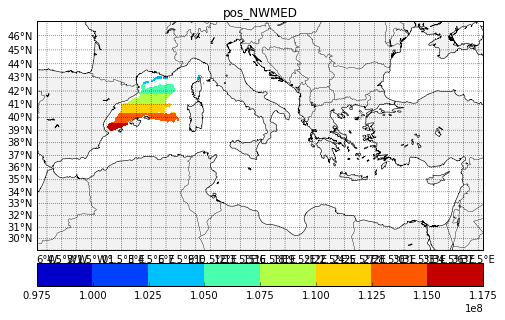

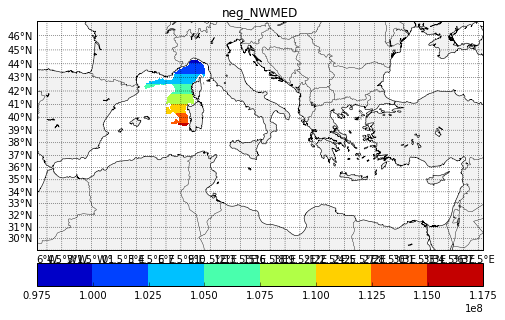

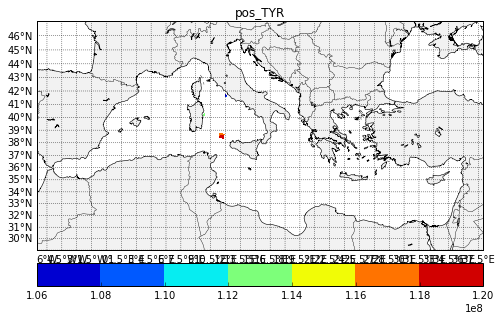

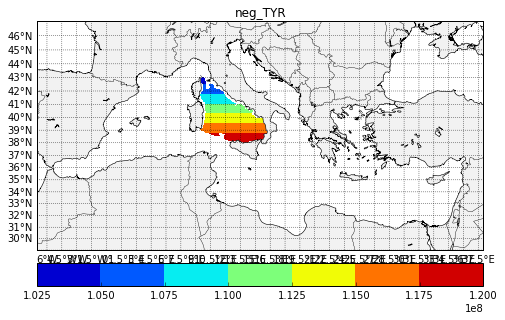

In [38]:
# 17/05 Trying to decompose the script => we work on 1 or 2 regions only

# 16/05 Doing vol_lev files for python computation script

# Création d'un premier masque sur la bathy!
dxdy = np.ma.masked_where(bathy<200,dxdy)
sens_list = ['pos', 'neg'] # , 'neg'

for z in np.arange(0,43):
    dz[z,:,:] = np.ma.masked_where(bathy<200,dz[z,:,:])

# 27/02 NEW VERSION for smaller regions
basin_list = ['NWMED', 'TYR'] # , 'TYR', 'ADR'

for basin in basin_list:
    
    if basin == 'NWMED':
        y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                39.247095, 46.4938123, 44.4124705]
        x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                -1.17747, 5.2446879, 10.1001797]
    elif basin == 'TYR':
        y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
        x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
    elif basin == 'ADR':
        y = [40.138887,39.746050,43,43]
        x = [18.343058,20.052826,20.052826,13]
    else:
        print 'Les coordonnées pour : ', basin, ' ne sont pas définies ici'
    
    print 'Treating basin:', basin
    
    # Selecting the data
    vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
    path = Path(vertices, codes=None, closed=True);
    indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                    transform=None, radius=0.0)
    indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone
    
# 17/05
    for sens in sens_list:
        
        dxdy_m = np.zeros([160,394])
        dz_m = np.zeros([43,160,394])
        
        # Masque pour la région
        #dxdy_m = np.ma.masked_array(dxdy, indices_re == False)
        #dxdy_m = np.ma.masked_where(mask[z] == 0, dxdy_m) # masking data
        #dxdy_m = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),dxdy_m)
        pmet1 = np.ma.masked_array(dxdy, indices_re == False)
        pmet2 = np.ma.masked_where(mask[z] == 0, pmet1) # masking data
        dxdy_m = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),pmet2)
        
        print sens+'_'+basin, 'np.ma.sum =' , np.ma.sum(dxdy_m), 'np.nansum =', np.nansum(dxdy_m)
        
        # doing a map
        m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
        plt.figure(figsize=(8,8))
        ax = fig.add_axes([0.1,0.1,0.8,0.8]);
        m.drawcountries(linewidth=0.4);
        m.drawcoastlines(linewidth=0.6);
        m.fillcontinents(color='0.95',lake_color='white');
        parallels = np.arange(0.,81,1);
        m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
        meridians = np.arange(-6.,351.,1.5);
        m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

        # Données
        xd,yd = m(lon_t,lat_t);
        levels = np.arange(-12,12,1)
        cs = m.contourf(xd,yd,dxdy_m,cmap=plt.cm.jet);# binary / jet levels=levels,
        plt.colorbar(cs, orientation='horizontal', pad = 0.03)
        plt.title(sens+'_'+basin)
            


Treating basin: NWMED
dxdy pos_NWMED np.ma.sum = 1.21327e+11 np.nansum = 1.21327e+11
dz pos_NWMED np.ma.sum = -- np.nansum = --
dz pos_NWMED np.ma.sum = 723.022 np.nansum = 723.022
dz pos_NWMED np.ma.sum = 26382.5 np.nansum = 26382.5
dz pos_NWMED np.ma.sum = 62310.8 np.nansum = 62310.8
dz pos_NWMED np.ma.sum = 86771.4 np.nansum = 86771.4
 
dxdy neg_NWMED np.ma.sum = 9.92714e+10 np.nansum = 9.92714e+10
dz neg_NWMED np.ma.sum = -- np.nansum = --
dz neg_NWMED np.ma.sum = 341.463 np.nansum = 341.463
dz neg_NWMED np.ma.sum = 40833.4 np.nansum = 40833.4
dz neg_NWMED np.ma.sum = 84278.6 np.nansum = 84278.6
dz neg_NWMED np.ma.sum = 97445.8 np.nansum = 97445.8
 
Treating basin: TYR
dxdy pos_TYR np.ma.sum = 3.65939e+09 np.nansum = 3.65939e+09
dz pos_TYR np.ma.sum = -- np.nansum = --
dz pos_TYR np.ma.sum = -- np.nansum = --
dz pos_TYR np.ma.sum = -- np.nansum = --
dz pos_TYR np.ma.sum = -- np.nansum = --
dz pos_TYR np.ma.sum = -- np.nansum = --
 
dxdy neg_TYR np.ma.sum = 1.70645e+11 np.nansum = 1

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in less
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less


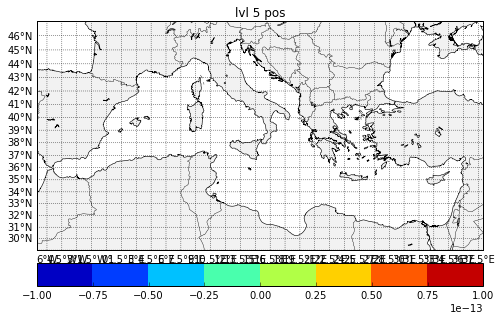

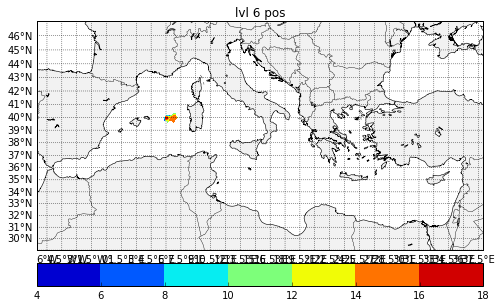

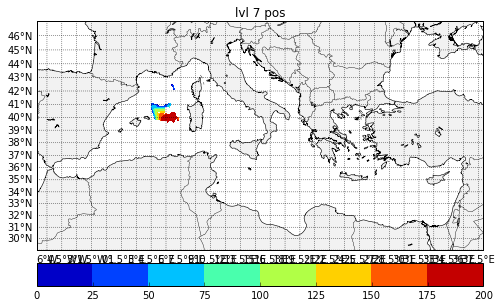

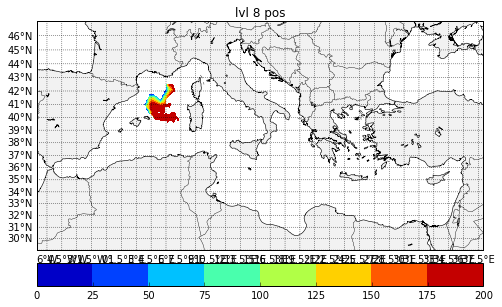

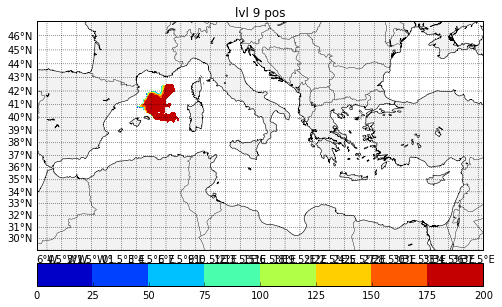

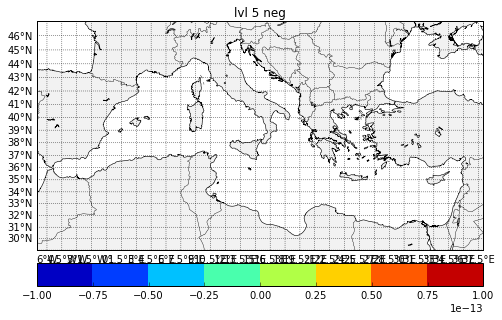

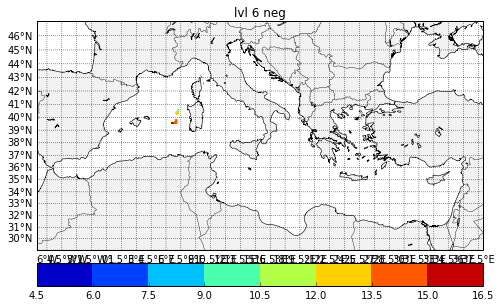

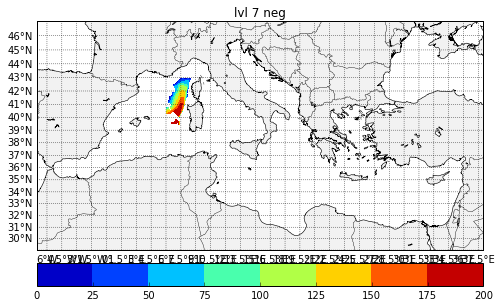

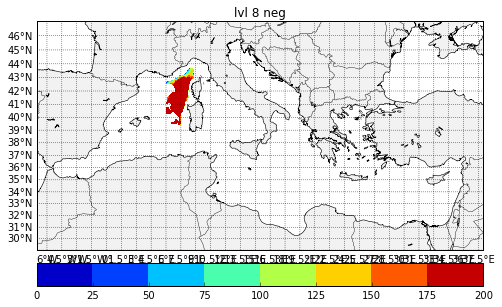

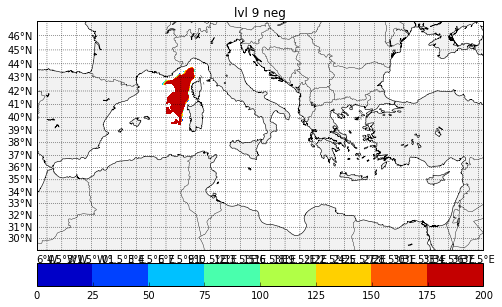

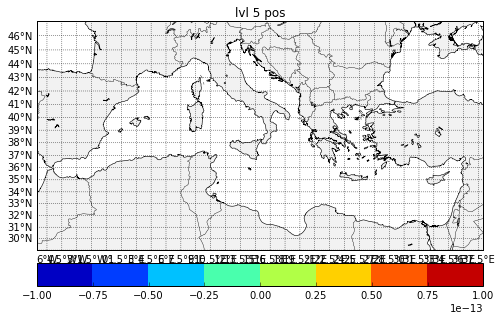

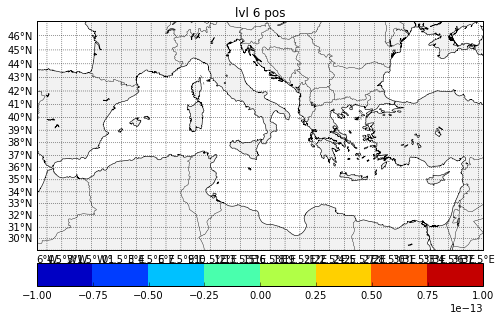

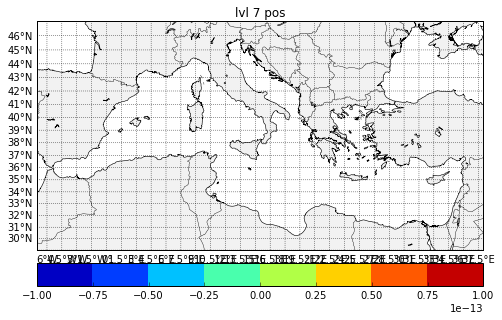

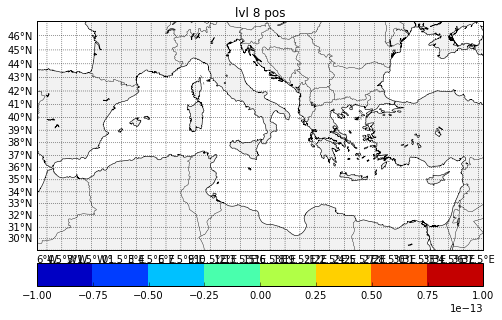

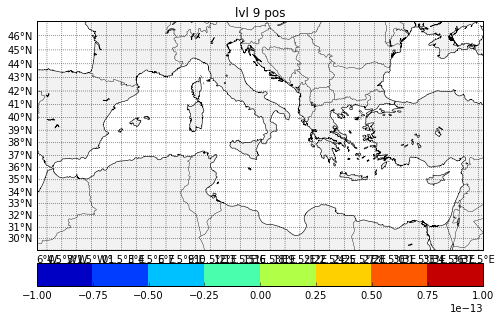

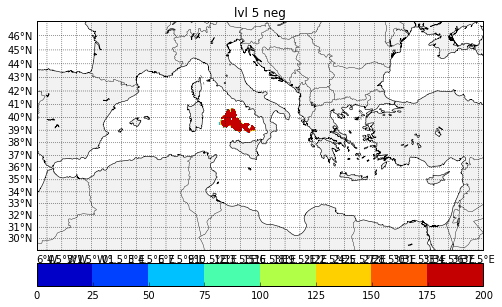

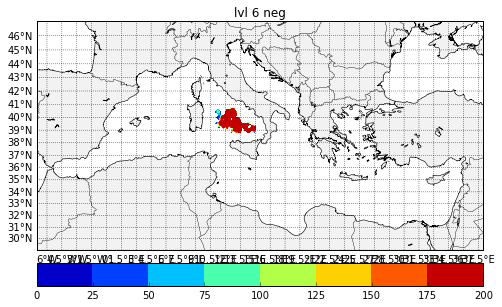

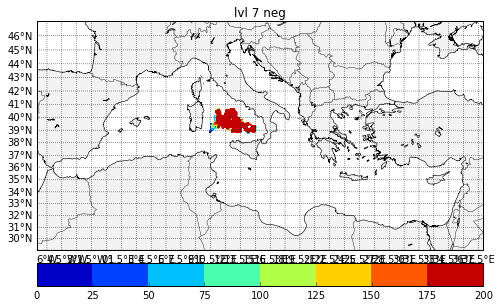

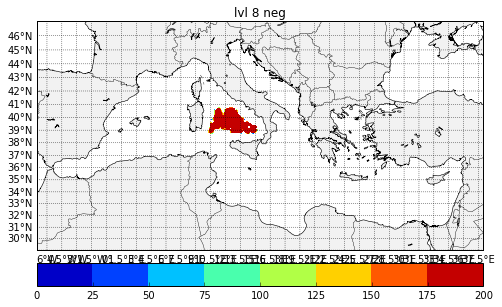

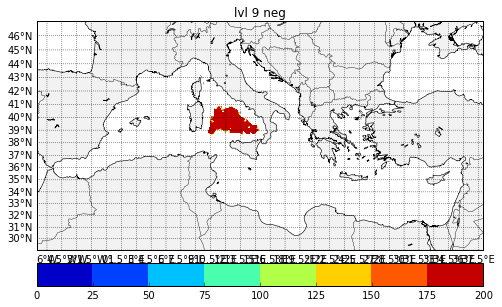

In [44]:
# 17/05 Trying to decompose the script => we work on 1 or 2 regions only

# 16/05 Doing vol_lev files for python computation script

# Création d'un premier masque sur la bathy!
dxdy = np.ma.masked_where(bathy<200,dxdy)
sens_list = ['pos', 'neg'] # , 'neg'

for z in np.arange(0,43):
    dz[z,:,:] = np.ma.masked_where(bathy<200,dz[z,:,:])

# 27/02 NEW VERSION for smaller regions
basin_list = ['NWMED', 'TYR'] # , 'TYR', 'ADR'

for basin in basin_list:
    
    if basin == 'NWMED':
        y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                39.247095, 46.4938123, 44.4124705]
        x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                -1.17747, 5.2446879, 10.1001797]
    elif basin == 'TYR':
        y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
        x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
    elif basin == 'ADR':
        y = [40.138887,39.746050,43,43]
        x = [18.343058,20.052826,20.052826,13]
    else:
        print 'Les coordonnées pour : ', basin, ' ne sont pas définies ici'
    
    print 'Treating basin:', basin
    
    # Selecting the data
    vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
    path = Path(vertices, codes=None, closed=True);
    indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                    transform=None, radius=0.0)
    indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone
    
# 17/05
    for sens in sens_list:
        dxdy_m = np.zeros([160,394])
        dz_m = np.zeros([43,160,394])
        
        # Masque pour la région
        dxdy_m = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),dxdy)
        
        print 'dxdy '+sens+'_'+basin, 'np.ma.sum =' , np.ma.sum(dxdy_m), 'np.nansum =', np.nansum(dxdy_m)
                
        int_vol = 0
        
        for z in np.arange(5,10):
            temp1 = np.ma.masked_array(dz[z,:,:], indices_re == False)
            temp2 = np.ma.masked_where(mask[z] == 0, temp1)
            #temp3 = np.ma.masked_where(dz_m[z,:,:]<1, temp2)
            temp3 = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),temp2)
            #temp4 = np.ma.masked_where(temp3==-9999, temp3)
            #dz_m[z,:,:] = temp4
            #print 'temp4', np.ma.sum(temp4)
            print 'dz '+sens+'_'+basin, 'np.ma.sum =' , np.ma.sum(temp3), 'np.nansum =', np.nansum(temp3)
            
            # doing a map
            m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
            plt.figure(figsize=(8,8))
            ax = fig.add_axes([0.1,0.1,0.8,0.8]);
            m.drawcountries(linewidth=0.4);
            m.drawcoastlines(linewidth=0.6);
            m.fillcontinents(color='0.95',lake_color='white');
            parallels = np.arange(0.,81,1);
            m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
            meridians = np.arange(-6.,351.,1.5);
            m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

            # Données
            xd,yd = m(lon_t,lat_t);
            levels = np.arange(-12,12,1)
            cs = m.contourf(xd,yd,temp3,cmap=plt.cm.jet);# binary / jet levels=levels,
            plt.colorbar(cs, orientation='horizontal', pad = 0.03)
            plt.title('lvl '+str(z)+' '+sens)
        print ' '

In [ ]:
### ESSAI 3

In [59]:
# 18/05 Après checks en unique sur dxdy puis dz, ESSAI 3 sur le produit des deux

# 16/05 Doing vol_lev files for python computation script

# Création d'un premier masque sur la bathy!
dxdy = np.ma.masked_where(bathy<200,dxdy)
sens_list = ['pos'] # , 'neg'

for z in np.arange(0,43):
    dz[z,:,:] = np.ma.masked_where(bathy<200,dz[z,:,:])

# 27/02 NEW VERSION for smaller regions
basin_list = ['NWMED'] # , 'TYR', 'ADR'

for basin in basin_list:
    
    if basin == 'NWMED':
        y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                39.247095, 46.4938123, 44.4124705]
        x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                -1.17747, 5.2446879, 10.1001797]
    elif basin == 'TYR':
        y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
        x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
    elif basin == 'ADR':
        y = [40.138887,39.746050,43,43]
        x = [18.343058,20.052826,20.052826,13]
    else:
        print 'Les coordonnées pour : ', basin, ' ne sont pas définies ici'
    
    print 'Treating basin:', basin
    
    # Selecting the data
    vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
    path = Path(vertices, codes=None, closed=True);
    indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                    transform=None, radius=0.0)
    indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone
    
# 17/05
    for sens in sens_list:
        dxdy_m = np.zeros([160,394])
        dz_m = np.zeros([43,160,394])
        
        # Masque pour la région
        dxdy_m = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),dxdy)
        
        print 'dxdy '+sens+'_'+basin, 'np.ma.sum =' , np.ma.sum(dxdy_m), 'np.nansum =', np.nansum(dxdy_m)
                
        int_vol = 0
        vars()['tot_vol_'+sens+'_'+basin] = np.zeros([43,160,394])
        vars()['tot_vol_'+sens+'_'+basin][:] = np.nan
        
        for z in np.arange(41,43):
            temp1 = np.ma.masked_array(dz[z,:,:], indices_re == False)
            temp2 = np.ma.masked_where(mask[z] == 0, temp1)
            #temp3 = np.ma.masked_where(dz_m[z,:,:]<1, temp2)
            temp3 = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),temp2)
            dz_m[z,:,:] = temp3
            print 'temp3 '+sens+'_'+basin, 'np.ma.sum =' , np.ma.sum(temp3), 'np.nansum =', np.nansum(temp3)
            print 'dz_m '+sens+'_'+basin, 'np.ma.sum =' , np.ma.sum(dz_m[z,:,:]), 'np.nansum =', np.nansum(dz_m[z,:,:])
            print ' '
            
            for i in np.arange(59,394): # i<59 = Atlantique
            #for i in [136]:
                for j in np.arange(0,160):
                #for j in [100]:
                    if (np.ma.is_masked(dz_m[z,j,i])==False and np.ma.is_masked(dxdy_m[j,i])==False):
                        vars()['tot_vol_'+sens+'_'+basin][z,j,i] = dxdy_m[j,i] * dz_m[z,j,i]
                        print 'i =',i,'j =',j,' ; dxdy_m[j,i] =', dxdy_m[j,i], 'dz_m[z,j,i] =',dz_m[z,j,i]
                        print 'produit =', dxdy_m[j,i] * dz_m[z,j,i]
            print ' '

Treating basin: NWMED
dxdy pos_NWMED np.ma.sum = 1.21327e+11 np.nansum = 1.21327e+11
temp3 pos_NWMED np.ma.sum = 7298.95 np.nansum = 7298.95
dz_m pos_NWMED np.ma.sum = -412694354.391 np.nansum = -412694354.391
 
i = 104 j = 88  ; dxdy_m[j,i] = 1.15911e+08 dz_m[z,j,i] = 6.63643121719
produit = 769237608.657
i = 105 j = 87  ; dxdy_m[j,i] = 1.16231e+08 dz_m[z,j,i] = 6.63625907898
produit = 771341258.792
i = 105 j = 88  ; dxdy_m[j,i] = 1.15911e+08 dz_m[z,j,i] = 6.63618850708
produit = 769209475.803
i = 105 j = 89  ; dxdy_m[j,i] = 1.15592e+08 dz_m[z,j,i] = 6.63624715805
produit = 767094108.455
i = 105 j = 90  ; dxdy_m[j,i] = 1.15272e+08 dz_m[z,j,i] = 6.63645076752
produit = 764996899.782
i = 106 j = 85  ; dxdy_m[j,i] = 1.16872e+08 dz_m[z,j,i] = 6.63642168045
produit = 775611821.546
i = 106 j = 86  ; dxdy_m[j,i] = 1.16552e+08 dz_m[z,j,i] = 6.63616371155
produit = 773455232.996
i = 106 j = 87  ; dxdy_m[j,i] = 1.16231e+08 dz_m[z,j,i] = 6.63604640961
produit = 771316539.947
i = 106 j = 88  ; dx

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in less
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less


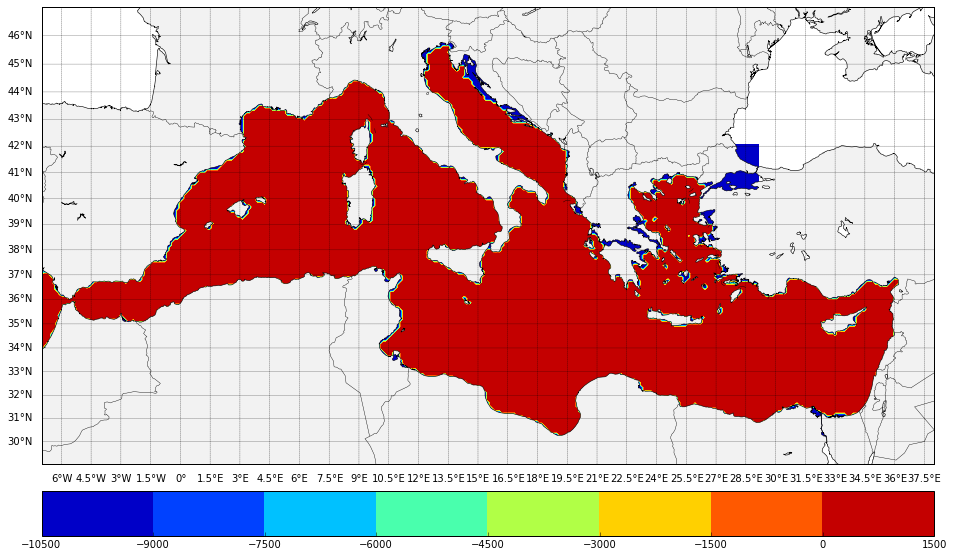

In [60]:
# doing a map
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
plt.figure(figsize=(16,16))
ax = fig.add_axes([0.1,0.1,0.8,0.8]);
m.drawcountries(linewidth=0.4);
m.drawcoastlines(linewidth=0.6);
m.fillcontinents(color='0.95',lake_color='white');
parallels = np.arange(0.,81,1);
m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
meridians = np.arange(-6.,351.,1.5);
m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);
            
# Données
xd,yd = m(lon_t,lat_t);
levels = np.arange(-12,12,1)
cs = m.contourf(xd,yd,dz_m[z,:,:],cmap=plt.cm.jet);# binary / jet levels=levels,
plt.colorbar(cs, orientation='horizontal', pad = 0.03)

In [61]:
np.nansum(vars()['tot_vol_'+sens+'_'+basin])

1610112020532.5823

In [72]:
# 18/05 ESSAI 4 sur une seule région avec tout

# 16/05 Doing vol_lev files for python computation script

# Création d'un premier masque sur la bathy!
dxdy = np.ma.masked_where(bathy<200,dxdy)
sens_list = ['pos'] # , 'neg'

for z in np.arange(0,43):
    dz[z,:,:] = np.ma.masked_where(bathy<200,dz[z,:,:])

# 27/02 NEW VERSION for smaller regions
basin_list = ['NWMED'] # , 'TYR', 'ADR'

for basin in basin_list:
    
    if basin == 'NWMED':
        y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                39.247095, 46.4938123, 44.4124705]
        x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                -1.17747, 5.2446879, 10.1001797]
    elif basin == 'TYR':
        y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
        x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
    elif basin == 'ADR':
        y = [40.138887,39.746050,43,43]
        x = [18.343058,20.052826,20.052826,13]
    else:
        print 'Les coordonnées pour : ', basin, ' ne sont pas définies ici'
    
    print 'Treating basin:', basin
    
    # Selecting the data
    vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
    path = Path(vertices, codes=None, closed=True);
    indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                    transform=None, radius=0.0)
    indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone
    
# 17/05
    for sens in sens_list:
        dxdy_m = np.zeros([160,394])
        #dz_m = np.zeros([43,160,394])
        #dz_m[:] = np.nan
        
        # Masque pour la région
        dxdy_m = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),dxdy)
        
        print 'dxdy '+sens+'_'+basin, 'np.ma.sum =' , np.ma.sum(dxdy_m), 'np.nansum =', np.nansum(dxdy_m)
                
        int_vol = 0
        
        vars()['tot_vol_'+sens+'_'+basin] = np.zeros([43,160,394])
        vars()['tot_vol_'+sens+'_'+basin][:] = np.nan
        
        for z in np.arange(0,43):
            temp1 = np.ma.masked_array(dz[z,:,:], indices_re == False)
            temp2 = np.ma.masked_where(mask[z] == 0, temp1)
            #temp3 = np.ma.masked_where(dz_m[z,:,:]<1, temp2)
            temp3 = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),temp2)
            #dz_m[z,:,:] = temp3
            print 'temp3 '+sens+'_'+basin, 'np.ma.sum =' , np.ma.sum(temp3), 'np.nansum =', np.nansum(temp3)
            #print 'dz_m '+sens+'_'+basin, 'np.ma.sum =' , np.ma.sum(dz_m[z,:,:]), 'np.nansum =', np.nansum(dz_m[z,:,:])
            print ' '
            
            for i in np.arange(59,394): # i<59 = Atlantique
            #for i in [136]:
                for j in np.arange(0,160):
                #for j in [100]:
                    #if (np.ma.is_masked(dz_m[z,j,i])==False and np.ma.is_masked(dxdy_m[j,i])==False):
                    if (np.ma.is_masked(temp3[j,i])==False and np.ma.is_masked(dxdy_m[j,i])==False):
                        #vars()['tot_vol_'+sens+'_'+basin][z,j,i] = dxdy_m[j,i] * dz_m[z,j,i]
                        vars()['tot_vol_'+sens+'_'+basin][z,j,i] = dxdy_m[j,i] * temp3[j,i]
                        #print 'i =',i,'j =',j,' ; dxdy_m[j,i] =', dxdy_m[j,i], 'dz_m[z,j,i] =',dz_m[z,j,i]
                        #print 'produit =', dxdy_m[j,i] * dz_m[z,j,i]

            int_vol = int_vol + np.nansum(vars()['tot_vol_'+sens+'_'+basin][z,:,:])
            vars()['vol_lev_'+sens+'_'+basin][z] = np.ma.sum(vars()['tot_vol_'+sens+'_'+basin][z,:,:])
            #print z
            print 'z =', z, 'int_vol (km3) =', int_vol * 1e-9, 'vol[z] =', np.nansum(vars()['tot_vol_'+sens+'_'+basin][z,:,:])
            #print 'dxdy nansum =', np.ma.sum(dxdy[:,:]), 'dz_m nansum =', np.ma.sum(dz_m[z,:,:])
            print 'dxdy nansum =', np.ma.sum(dxdy[:,:]), 'temp3 ma sum =', np.ma.sum(temp3[:,:])
            print ' '

Treating basin: NWMED
dxdy pos_NWMED np.ma.sum = 1.21327e+11 np.nansum = 1.21327e+11
temp3 pos_NWMED np.ma.sum = -- np.nansum = --
 
z = 0 int_vol (km3) = 0.0 vol[z] = 0.0
dxdy nansum = 2.22878e+12 temp3 ma sum = --
 
temp3 pos_NWMED np.ma.sum = -- np.nansum = --
 
z = 1 int_vol (km3) = 0.0 vol[z] = 0.0
dxdy nansum = 2.22878e+12 temp3 ma sum = --
 
temp3 pos_NWMED np.ma.sum = -- np.nansum = --
 
z = 2 int_vol (km3) = 0.0 vol[z] = 0.0
dxdy nansum = 2.22878e+12 temp3 ma sum = --
 
temp3 pos_NWMED np.ma.sum = -- np.nansum = --
 
z = 3 int_vol (km3) = 0.0 vol[z] = 0.0
dxdy nansum = 2.22878e+12 temp3 ma sum = --
 
temp3 pos_NWMED np.ma.sum = -- np.nansum = --
 
z = 4 int_vol (km3) = 0.0 vol[z] = 0.0
dxdy nansum = 2.22878e+12 temp3 ma sum = --
 
temp3 pos_NWMED np.ma.sum = -- np.nansum = --
 
z = 5 int_vol (km3) = 0.0 vol[z] = 0.0
dxdy nansum = 2.22878e+12 temp3 ma sum = --
 
temp3 pos_NWMED np.ma.sum = 723.022 np.nansum = 723.022
 
z = 6 int_vol (km3) = 82.163824064 vol[z] = 82163824064.0
d

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in less
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less


In [97]:
# 18/05 ESSAI 5 avec toutes les régions

# 16/05 Doing vol_lev files for python computation script

# Création d'un premier masque sur la bathy!
dxdy = np.ma.masked_where(bathy<200,dxdy)
sens_list = ['pos', 'neg']

for z in np.arange(0,43):
    dz[z,:,:] = np.ma.masked_where(bathy<200,dz[z,:,:])

# 27/02 NEW VERSION for smaller regions
basin_list = ['ALB_ALG', 'ADR', 'N_ION', 'NWMED', 'EMED', 'S_ION', 'TYR', 'CMED', 'AEG', 'GOL']

for basin in basin_list:
    
    if basin == 'NWMED':
        y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                39.247095, 46.4938123, 44.4124705]
        x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                -1.17747, 5.2446879, 10.1001797]
    elif basin == 'ALB_ALG':
        y = [35.093681, 35.093681, 37, 37.252960, 38.756497, 39.938244, 39.1284526, 36.93272338, 35.930524]
        x = [-0.690137, -6, -6, -2.159892, -0.162487, 4.159323, 8.92564455, 9, 3.994854] # 9.90934876
    elif basin == 'TYR':
        y = [39.12845260900497,37.88508389278273,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,
                39.25645461354518,40.44930918149475,43.44829732432269,42.97458858683228,43.0604306783546,42.96837802751135,
                41.96306909843022,41.43113753799402,41.16267859938984,40.91067143551019,39.12845260900497]
        x = [8.925644550468935,13.3111744311976,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,
                16.43223864162354,16.01437911440215,11.68790444824612,10.82516607380484,9.824600457364721,9.409248985801327,
                9.294900137395576,9.198952404436941,9.339783959671131,9.097279040223231,8.925644550468935]
    elif basin == 'CMED':
        y = [39.1284526, 36.93272338, 32, 32, 37, 37.88508389278273]
        x = [8.92564455, 9, 10, 15, 15, 13.3111744311976] # 9.90934876
    elif basin == 'ADR':
        y = [40.138887,39.746050,43,43]
        x = [18.343058,20.052826,20.052826,13]
    elif basin == 'N_ION':
        y = [37.001816,38.03532811253486,38.19020427258793,38.206530069008,38.49522011750975,39.25645461354518,
                40.44930918149475,40.857014,40.138887,39.746050,37.503355,37]
        x = [15.084801,15.29159159227882,15.48719160249115,15.74199259491107,16.21860737848962,16.43223864162354,
                16.01437911440215,16.854632,18.343058,20.052826,21.936077,21.936077]
    elif basin == 'S_ION':
        y = [37,29.658354,30.941890,31.924008, #37.503355
                37.001816]
        x = [21.936077,20.090485,15.297679,15.081913,15.084801]
    elif basin == 'EMED':
        y = [37,35.335479,35.045582,35.478996,36.113327,40.879240,37.180585, 37.180585,30.329515,29.658354]
        x = [21.936077,23.620988,26.217209,27.159167,28.006273,30.504893,37.441401, 37.441401,35.238352,20.090485]
    elif basin == 'AEG':
        y = [43,39.746050,37.503355,37,35.335479,35.045582,35.478996,36.113327,40.879240]
        x = [20.052826,20.052826,21.936077,21.936077,23.620988,26.217209,27.159167,28.006273,30.504893]
    elif basin == 'GOL':
        y = [43.5,43.5,41,41]
        x = [3,6.5,6.5,3]
    else:
        print 'Les coordonnées pour : ', basin, ' ne sont pas définies ici'
    
    print 'Treating basin:', basin
    
    # Selecting the data
    vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
    path = Path(vertices, codes=None, closed=True);
    indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                    transform=None, radius=0.0)
    indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone
    
# 17/05
    for sens in sens_list:
        dxdy_m = np.zeros([160,394])
        #dz_m = np.zeros([43,160,394])
        #dz_m[:] = np.nan
        
        # Masque pour la région
        dxdy_m = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),dxdy)
        #print 'dxdy '+sens+'_'+basin, 'np.ma.sum =' , np.ma.sum(dxdy_m), 'np.nansum =', np.nansum(dxdy_m)
        
        vars()['tot_vol_'+sens+'_'+basin] = np.zeros([43,160,394])
        vars()['tot_vol_'+sens+'_'+basin][:] = np.nan               
        vars()['vol_lev_'+sens+'_'+basin] = np.zeros([43])
        vars()['vol_lev_'+sens+'_'+basin][:] = np.nan 
        print 'creating var', 'tot_vol_'+sens+'_'+basin
                
        int_vol = 0
        
        for z in np.arange(0,43):
            temp1 = np.ma.masked_array(dz[z,:,:], indices_re == False)
            temp2 = np.ma.masked_where(mask[z] == 0, temp1)
            #temp3 = np.ma.masked_where(dz_m[z,:,:]<1, temp2)
            temp3 = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),temp2)
            #dz_m[z,:,:] = temp3
            print 'temp3 '+sens+'_'+basin, 'np.ma.sum =' , np.ma.sum(temp3), 'np.nansum =', np.nansum(temp3)
            #print 'dz_m '+sens+'_'+basin, 'np.ma.sum =' , np.ma.sum(dz_m[z,:,:]), 'np.nansum =', np.nansum(dz_m[z,:,:])
            print ' '
            
            for i in np.arange(59,394): # i<59 = Atlantique
            #for i in [136]:
                for j in np.arange(0,160):
                #for j in [100]:
                    #if (np.ma.is_masked(dz_m[z,j,i])==False and np.ma.is_masked(dxdy_m[j,i])==False):
                    if (np.ma.is_masked(temp3[j,i])==False and np.ma.is_masked(dxdy_m[j,i])==False):
                        #vars()['tot_vol_'+sens+'_'+basin][z,j,i] = dxdy_m[j,i] * dz_m[z,j,i]
                        vars()['tot_vol_'+sens+'_'+basin][z,j,i] = dxdy_m[j,i] * temp3[j,i]
                        #print 'i =',i,'j =',j,' ; dxdy_m[j,i] =', dxdy_m[j,i], 'dz_m[z,j,i] =',dz_m[z,j,i]
                        #print 'produit =', dxdy_m[j,i] * dz_m[z,j,i]

            int_vol = int_vol + np.nansum(vars()['tot_vol_'+sens+'_'+basin][z,:,:])
            vars()['vol_lev_'+sens+'_'+basin][z] = np.nansum(vars()['tot_vol_'+sens+'_'+basin][z,:,:])
            #print z
            print 'z =', z, 'int_vol (km3) =', int_vol * 1e-9, 'vol[z] =', np.nansum(vars()['tot_vol_'+sens+'_'+basin][z,:,:])
            
        vars()['vol_lev_'+sens+'_'+basin] = pd.DataFrame(vars()['vol_lev_'+sens+'_'+basin], columns=["vol_m3"]) # final results seem ok
        #vars()['vol_lev_'+sens+'_'+basin].rename(columns={"":"level","0":"vol_m3"},inplace=True)
        vars()['vol_lev_'+sens+'_'+basin].to_csv(path_or_buf='./vol_lev_'+sens+'_'+basin+'.csv') # nécessite fichier pd.DataFrame avant tout

        print ' '

Treating basin: ALB_ALG
creating var tot_vol_pos_ALB_ALG
temp3 pos_ALB_ALG np.ma.sum = -- np.nansum = --
 
z = 0 int_vol (km3) = 0.0 vol[z] = 0.0
temp3 pos_ALB_ALG np.ma.sum = -- np.nansum = --
 
z = 1 int_vol (km3) = 0.0 vol[z] = 0.0
temp3 pos_ALB_ALG np.ma.sum = -- np.nansum = --
 
z = 2 int_vol (km3) = 0.0 vol[z] = 0.0
temp3 pos_ALB_ALG np.ma.sum = -- np.nansum = --
 
z = 3 int_vol (km3) = 0.0 vol[z] = 0.0
temp3 pos_ALB_ALG np.ma.sum = -- np.nansum = --
 
z = 4 int_vol (km3) = 0.0 vol[z] = 0.0
temp3 pos_ALB_ALG np.ma.sum = -- np.nansum = --
 
z = 5 int_vol (km3) = 0.0 vol[z] = 0.0
temp3 pos_ALB_ALG np.ma.sum = 1415.43 np.nansum = 1415.43
 
z = 6 int_vol (km3) = 167.976638912 vol[z] = 167976638912.0
temp3 pos_ALB_ALG np.ma.sum = 79707.9 np.nansum = 79707.9
 
z = 7 int_vol (km3) = 9750.13305869 vol[z] = 9.58215641978e+12
temp3 pos_ALB_ALG np.ma.sum = 131200.0 np.nansum = 131200.0
 
z = 8 int_vol (km3) = 25611.3602615 vol[z] = 1.58612272028e+13
temp3 pos_ALB_ALG np.ma.sum = 141104.0 np

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in less
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less


In [93]:
vol_lev_pos_ALB_ALG.head()

0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0

In [84]:
# 18/05 ESSAI 5 avec toutes les régions

# 16/05 Doing vol_lev files for python computation script

# Création d'un premier masque sur la bathy!
dxdy = np.ma.masked_where(bathy<200,dxdy)
sens_list = ['pos']

for z in np.arange(0,43):
    dz[z,:,:] = np.ma.masked_where(bathy<200,dz[z,:,:])

# 27/02 NEW VERSION for smaller regions
basin_list = ['ADR']

for basin in basin_list:
    
    if basin == 'NWMED':
        y = [43.44829732432269, 42.97458858683228, 43.0604306783546, 42.96837802751135, 41.96306909843022,
                41.43113753799402, 41.16267859938984, 40.91067143551019, 39.12845260900497, 39.938244, 38.756497,
                39.247095, 46.4938123, 44.4124705]
        x = [11.68790444824612, 10.82516607380484, 9.82460045736472, 9.409248985801327, 9.294900137395576,
                9.198952404436941, 9.339783959671131, 9.097279040223231, 8.925644550468935, 4.159323, -0.162487,
                -1.17747, 5.2446879, 10.1001797]
    elif basin == 'ADR':
        y = [40.138887,39.746050,43,43]
        x = [18.343058,20.052826,20.052826,13]
    else:
        print 'Les coordonnées pour : ', basin, ' ne sont pas définies ici'
    
    print 'Treating basin:', basin
    
    # Selecting the data
    vertices = np.array([np.hstack((x, 0)),np.hstack((y, 0))],float).transpose();
    path = Path(vertices, codes=None, closed=True);
    indices = path.contains_points(np.array([np.reshape(lon_t,(np.size(lon_t))),np.reshape(lat_t,(np.size(lat_t)))]).T,\
                    transform=None, radius=0.0)
    indices_re = np.reshape(indices,np.shape(lon_t))# this our mask for the zone
    
# 17/05
    for sens in sens_list:
        dxdy_m = np.zeros([160,394])
        #dz_m = np.zeros([43,160,394])
        #dz_m[:] = np.nan
        
        # Masque pour la région
        dxdy_m = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),dxdy)
        #print 'dxdy '+sens+'_'+basin, 'np.ma.sum =' , np.ma.sum(dxdy_m), 'np.nansum =', np.nansum(dxdy_m)
        
        vars()['tot_vol_'+sens+'_'+basin] = np.zeros([43,160,394])
        vars()['tot_vol_'+sens+'_'+basin][:] = np.nan               
        vars()['vol_lev_'+sens+'_'+basin] = np.zeros([43])
        vars()['vol_lev_'+sens+'_'+basin][:] = np.nan 
        print 'creating var', 'tot_vol_'+sens+'_'+basin
                
        int_vol = 0
        
        for z in np.arange(0,43):
            temp1 = np.ma.masked_array(dz[z,:,:], indices_re == False)
            temp2 = np.ma.masked_where(mask[z] == 0, temp1)
            #temp3 = np.ma.masked_where(dz_m[z,:,:]<1, temp2)
            temp3 = np.ma.masked_where(np.ma.getmask(vars()['mask_'+sens+'_'+basin]),temp2)
            #dz_m[z,:,:] = temp3
            print 'temp3 '+sens+'_'+basin, 'np.ma.sum =' , np.ma.sum(temp3), 'np.nansum =', np.nansum(temp3)
            #print 'dz_m '+sens+'_'+basin, 'np.ma.sum =' , np.ma.sum(dz_m[z,:,:]), 'np.nansum =', np.nansum(dz_m[z,:,:])
            print ' '
            
            for i in np.arange(59,394): # i<59 = Atlantique
            #for i in [136]:
                for j in np.arange(0,160):
                #for j in [100]:
                    #if (np.ma.is_masked(dz_m[z,j,i])==False and np.ma.is_masked(dxdy_m[j,i])==False):
                    if (np.ma.is_masked(temp3[j,i])==False and np.ma.is_masked(dxdy_m[j,i])==False):
                        #vars()['tot_vol_'+sens+'_'+basin][z,j,i] = dxdy_m[j,i] * dz_m[z,j,i]
                        vars()['tot_vol_'+sens+'_'+basin][z,j,i] = dxdy_m[j,i] * temp3[j,i]
                        #print 'i =',i,'j =',j,' ; dxdy_m[j,i] =', dxdy_m[j,i], 'dz_m[z,j,i] =',dz_m[z,j,i]
                        #print 'produit =', dxdy_m[j,i] * dz_m[z,j,i]

            int_vol = int_vol + np.nansum(vars()['tot_vol_'+sens+'_'+basin][z,:,:])
            vars()['vol_lev_'+sens+'_'+basin][z] = np.nansum(vars()['tot_vol_'+sens+'_'+basin][z,:,:])
            #print z
            print 'z =', z, 'int_vol (km3) =', int_vol * 1e-9, 'vol[z] =', np.nansum(vars()['tot_vol_'+sens+'_'+basin][z,:,:])
            print 'VERIF dxdy =', np.nansum(dxdy_m[:,:]), 'temp3', np.nansum(temp3)

Treating basin: ADR
creating var tot_vol_pos_ADR
temp3 pos_ADR np.ma.sum = -- np.nansum = --
 
z = 0 int_vol (km3) = 0.0 vol[z] = 0.0
VERIF dxdy = 2.96518e+10 temp3 --
temp3 pos_ADR np.ma.sum = -- np.nansum = --
 
z = 1 int_vol (km3) = 0.0 vol[z] = 0.0
VERIF dxdy = 2.96518e+10 temp3 --
temp3 pos_ADR np.ma.sum = -- np.nansum = --
 
z = 2 int_vol (km3) = 0.0 vol[z] = 0.0
VERIF dxdy = 2.96518e+10 temp3 --
temp3 pos_ADR np.ma.sum = -- np.nansum = --
 
z = 3 int_vol (km3) = 0.0 vol[z] = 0.0
VERIF dxdy = 2.96518e+10 temp3 --
temp3 pos_ADR np.ma.sum = -- np.nansum = --
 
z = 4 int_vol (km3) = 0.0 vol[z] = 0.0
VERIF dxdy = 2.96518e+10 temp3 --
temp3 pos_ADR np.ma.sum = -- np.nansum = --
 
z = 5 int_vol (km3) = 0.0 vol[z] = 0.0
VERIF dxdy = 2.96518e+10 temp3 --
temp3 pos_ADR np.ma.sum = -- np.nansum = --
 
z = 6 int_vol (km3) = 0.0 vol[z] = 0.0
VERIF dxdy = 2.96518e+10 temp3 --
temp3 pos_ADR np.ma.sum = -- np.nansum = --
 
z = 7 int_vol (km3) = 0.0 vol[z] = 0.0
VERIF dxdy = 2.96518e+10 temp3 --

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in less
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less


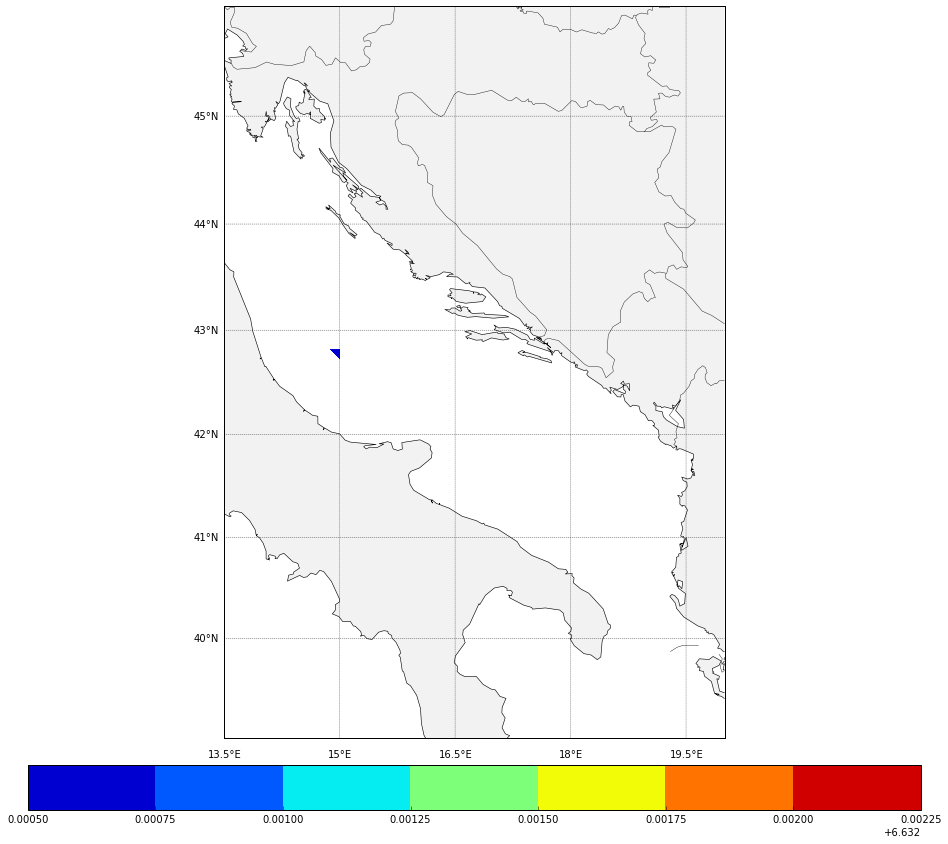

In [83]:
x1,x2,y1,y2 = 13.5, 20, 39, 46;
# doing a map
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
plt.figure(figsize=(16,16))
ax = fig.add_axes([0.1,0.1,0.8,0.8]);
m.drawcountries(linewidth=0.4);
m.drawcoastlines(linewidth=0.6);
m.fillcontinents(color='0.95',lake_color='white');
parallels = np.arange(0.,81,1);
m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
meridians = np.arange(-6.,351.,1.5);
m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);
            
# Données
xd,yd = m(lon_t,lat_t);
levels = np.arange(-12,12,1)
cs = m.contourf(xd,yd,temp3,cmap=plt.cm.jet);# binary / jet levels=levels,
plt.colorbar(cs, orientation='horizontal', pad = 0.03)

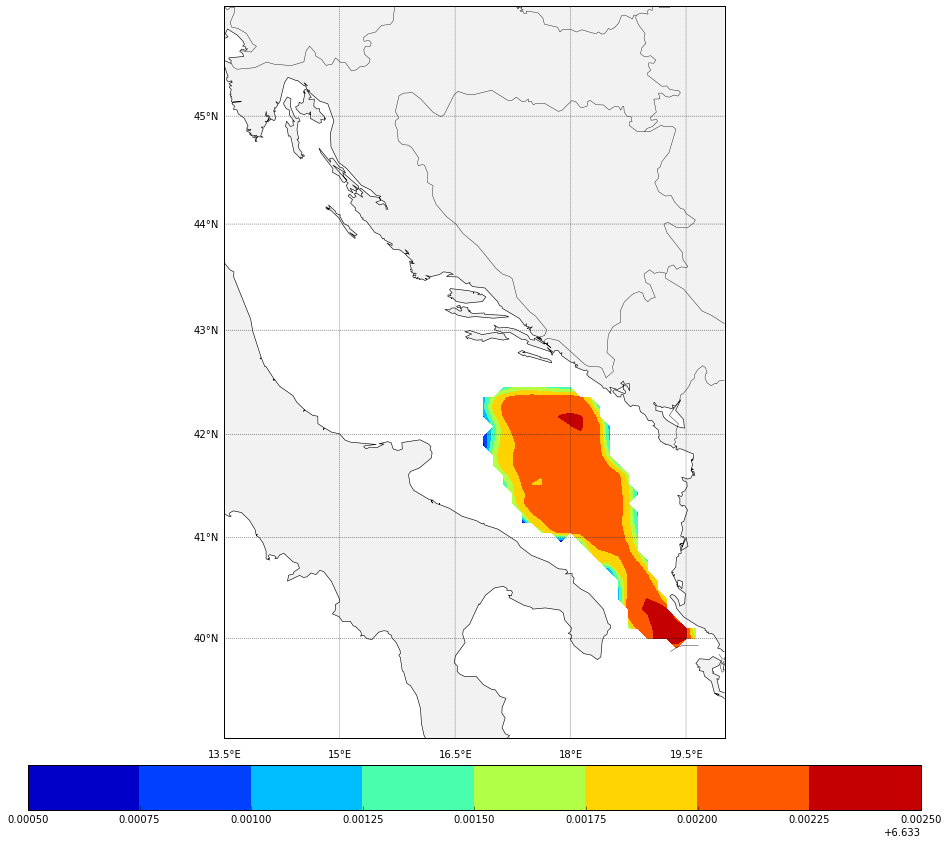

In [85]:
x1,x2,y1,y2 = 13.5, 20, 39, 46;
# doing a map
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
plt.figure(figsize=(16,16))
ax = fig.add_axes([0.1,0.1,0.8,0.8]);
m.drawcountries(linewidth=0.4);
m.drawcoastlines(linewidth=0.6);
m.fillcontinents(color='0.95',lake_color='white');
parallels = np.arange(0.,81,1);
m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
meridians = np.arange(-6.,351.,1.5);
m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);
            
# Données
xd,yd = m(lon_t,lat_t);
levels = np.arange(-12,12,1)
cs = m.contourf(xd,yd,temp3,cmap=plt.cm.jet);# binary / jet levels=levels,
plt.colorbar(cs, orientation='horizontal', pad = 0.03)